In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [0]:
X,y = make_blobs(n_samples=20,n_features=5,centers=2,random_state=19)

In [0]:
class PCA(object):
  def __init__(self,x,k):
    self.x = x
    self.k =k
  def mean_calculation(self):
    mu = np.mean(self.x,axis=0)
    return mu
  def std_calculation(self):
    std = np.std(self.x,axis=0)
    return std
  def standarize (self):
    z = np.divide(np.subtract(self.x,self.mean_calculation()),self.std_calculation())
    return z
  def covariance(self):
    return (self.standarize().T).dot(self.standarize())
  def eigen(self):
    eig_value, eig_vec = np.linalg.eig(self.covariance())
    return eig_value, eig_vec
  def component(self):
    eig_value, eig_vec = self.eigen()
    return np.flip(eig_vec[np.argsort(eig_value)][-self.k:],0)
  def transform(self):
    return self.standarize().dot(self.component().T)


In [0]:
p = PCA(X,2)

In [83]:
p.eigen()

(array([70.16822754, 18.6447628 ,  9.61048297,  1.27623117,  0.30029553]),
 array([[ 0.16373131,  0.9851596 ,  0.04907913,  0.01548932,  0.0019856 ],
        [ 0.41198518, -0.11321348,  0.90382696, -0.01591334, -0.01716144],
        [-0.51905053,  0.06559938,  0.26510537,  0.38288659,  0.71372282],
        [-0.52014231,  0.0692819 ,  0.23990182,  0.42126358, -0.69974003],
        [-0.51332133,  0.08683323,  0.2299007 , -0.8218526 , -0.02579081]]))

In [0]:
new_x = p.transform()

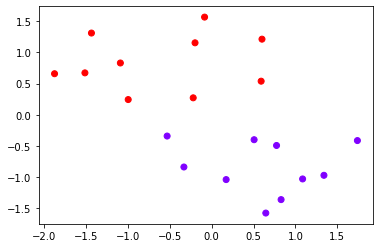

In [85]:
plt.scatter(new_x[:,0],new_x[:,1],c = y, cmap = 'rainbow')
plt.show()